In [1]:
from library.objective_function import *
from library.optimiser import *
from library.post_analysis import *
%matplotlib notebook

In [4]:
class single_experiment:
    def set_objective(self, objective_func):
        self.objective_func = objective_func

    def set_optimizer(self, optimizer):
        self.optimizer = optimizer

    def do(self):
        optimal, optimum, statistics = self.optimizer.optimise(self.objective_func)
        if np.linalg.norm(optimal - self.objective_func.get_optimal()) < 1e-1 \
        or np.linalg.norm(optimum - self.objective_func.get_optimum()) < 1e-1:
            statistics['status'] = 'global minimum'
        elif statistics['status'] != 'diverge':
            statistics['status'] = 'local minimum'
            #print("dist_val", np.linalg.norm(optimum - self.objective_func.get_optimum()))
        #print(statistics['status'])
        if self.optimizer.record == True:
            return statistics['status']
        else:
            self.analyser = post_analysis(statistics, self.objective_func)

In [12]:
def plot_scatter(x, y, res):
    fig = plt.figure(figsize=(10,10))
    sc = plt.scatter(x.ravel(), y.ravel(), c=res.ravel(), marker='o', vmin=0, vmax=1, s=35, cmap='YlGnBu')
    plt.colorbar(sc)
def plot_hotmap(data, mask):
    edge = 200
    scale = 40
    with sns.axes_style("white"):
        fig = plt.figure(figsize=(13, 13))
        ax = sns.heatmap(data, mask=mask, vmax=1, square=True,  cmap="YlGnBu")
        ax.set_xticklabels(np.arange(0, edge, scale))
        ax.set_yticklabels(np.arange(edge, 0, -scale))

# original CMA

In [5]:
#parameter of optimisation
np.random.seed(134)
# setup objective function
ak = ackley()
# setup adjust function optimizer
default = do_nothing()
# setup optmizer
paras = {}
paras['std'] = np.ones((2,)) * 3
paras['tol'] = 1e-5
paras['adjust_func'] = default
paras['record'] = True
paras['verbose'] = False
cma = cma_es()

# boil down to one expreiment
exp = single_experiment()
exp.set_objective(ak)


# parameters of sample area
edge = 200
scale = 40
size = 10
num = int(edge / scale)
# initlise matrix to record results
avg_res = np.zeros((num, num))
mask = np.ones_like(avg_res, dtype=np.uint8)
position_x = np.zeros_like(avg_res)
position_y = np.zeros_like(avg_res)

for i, x in enumerate(np.arange(0, edge, scale)):
    for j, y in enumerate(np.arange(0, x + scale, scale)):
        points = np.random.rand(size, 2) * scale + np.array([x, y]) 
        mask[num-1-j, i] = 0
        position_x[num-1-j, i] = x
        position_y[num-1-j, i] = y
        
        # calculate the probility of getting global minimum 
        res = np.zeros((size, ))
        for k in range(size):
            paras['mean0'] = points[k].reshape(2,1)
            cma.set_parameters(paras)
            exp.set_optimizer(cma)
            status = exp.do()
            if(status == 'global minimum'):
                res[k] = 1
            else:
                res[k] = 0
        avg_res[num-1-j, i] = np.mean(res)

*******starting optimisation from intitial mean:  [81.14036263 44.77642448]
*******starting optimisation from intitial mean:  [62.77456561 88.1898807 ]
*******starting optimisation from intitial mean:  [66.5074747  88.33665903]
*******starting optimisation from intitial mean:  [71.16700774 66.52716516]
*******starting optimisation from intitial mean:  [12.43250374  3.85633572]
*******starting optimisation from intitial mean:  [20.82922551 26.68596921]
*******starting optimisation from intitial mean:  [14.10310777 86.58957513]
*******starting optimisation from intitial mean:  [29.97454858 80.62560874]
*******starting optimisation from intitial mean:  [25.060872   42.90700896]
*******starting optimisation from intitial mean:  [13.13138029 89.06594361]
*******starting optimisation from intitial mean:  [138.85533258  54.1348074 ]
*******starting optimisation from intitial mean:  [126.17835093  74.89255969]
*******starting optimisation from intitial mean:  [191.17526188  50.02311194]
******

/Users/huajian/Non-convex/library/optimiser.py:188: RuntimeWarning:

invalid value encountered in sqrt

/Users/huajian/miniconda3/envs/ada/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce

/Users/huajian/Non-convex/library/optimiser.py:84: RuntimeWarning:

invalid value encountered in less

/Users/huajian/Non-convex/library/optimiser.py:87: RuntimeWarning:

invalid value encountered in less



diverge, raise LinAlgError!
*******starting optimisation from intitial mean:  [405.85480851  48.37744789]
*******starting optimisation from intitial mean:  [480.00044769  16.26340797]
*******starting optimisation from intitial mean:  [461.00391928  84.1366052 ]
*******starting optimisation from intitial mean:  [460.39123753  23.87557737]
*******starting optimisation from intitial mean:  [446.32407787  79.08060104]
*******starting optimisation from intitial mean:  [411.66124993  11.83793552]
*******starting optimisation from intitial mean:  [432.73327283  98.5350162 ]
*******starting optimisation from intitial mean:  [474.55610751  94.33672282]
*******starting optimisation from intitial mean:  [498.25232276  34.69591327]
*******starting optimisation from intitial mean:  [414.90878453   4.97085639]
*******starting optimisation from intitial mean:  [407.7705621  106.66121996]
*******starting optimisation from intitial mean:  [492.62922755 113.52968433]
*******starting optimisation from in

<IPython.core.display.Javascript object>


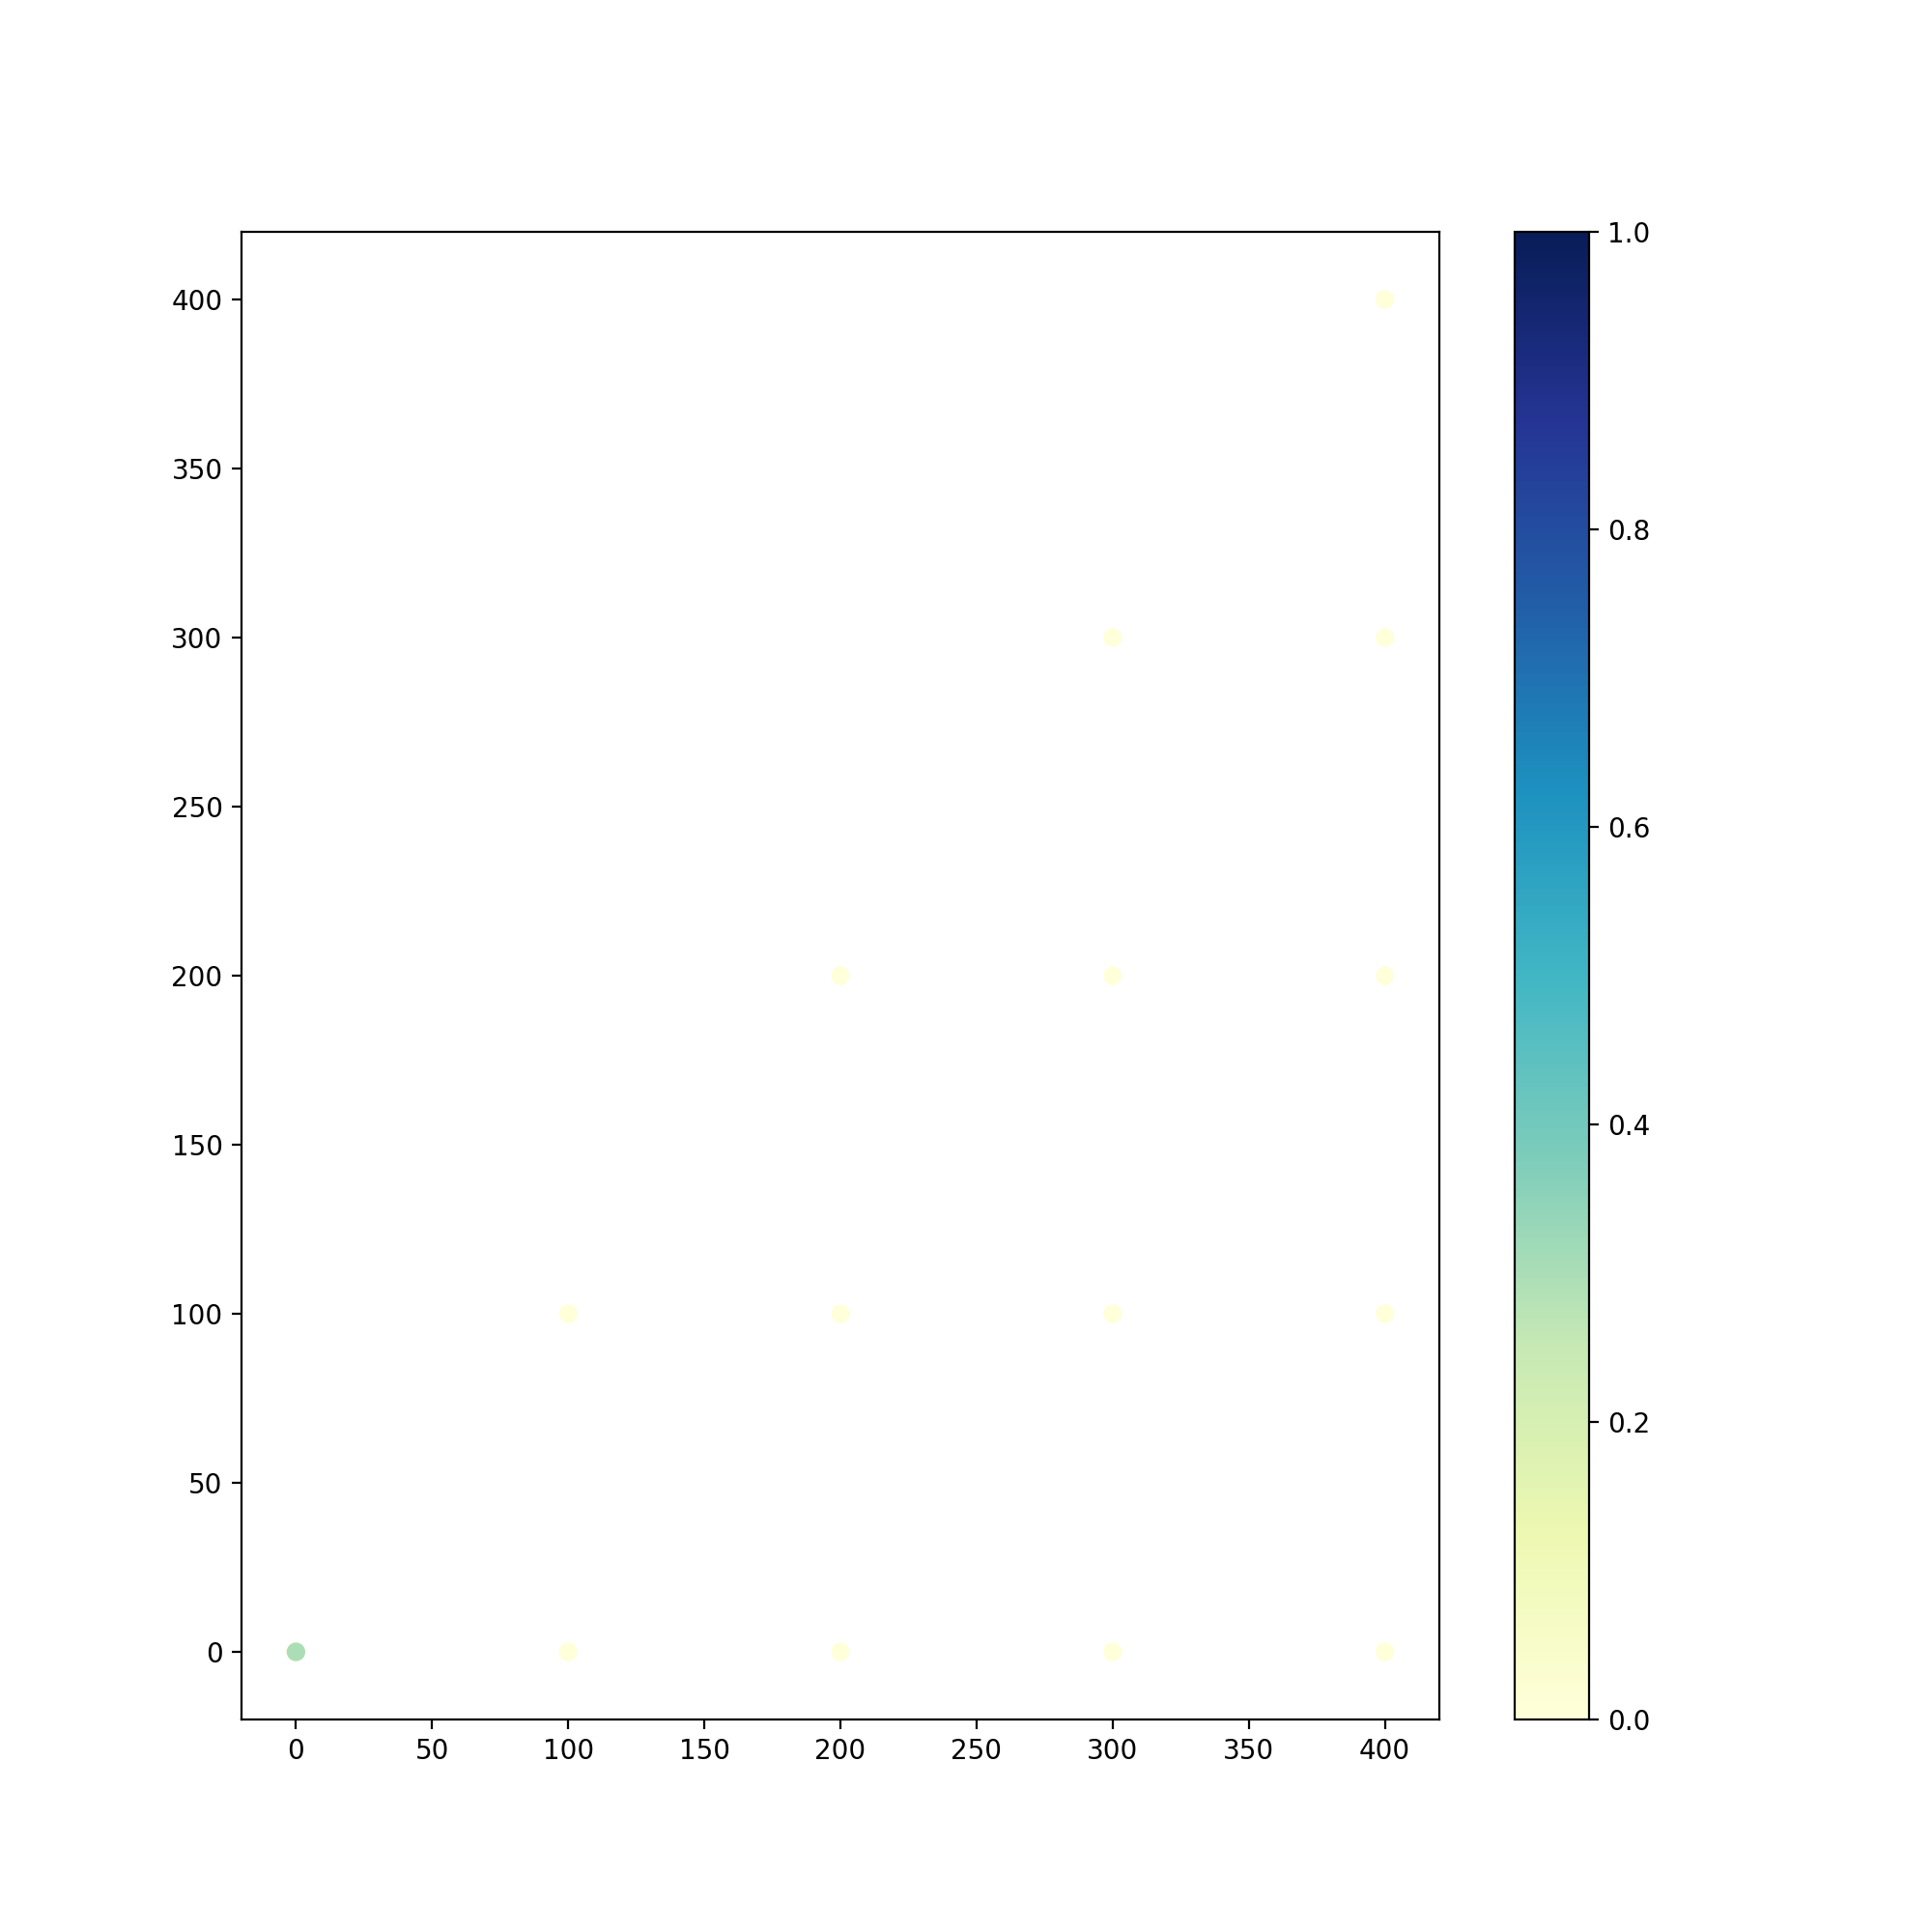

In [7]:
plot_scatter(position_x, position_y, avg_res)
#plt.savefig('scatter_roundOff.png')

<IPython.core.display.Javascript object>


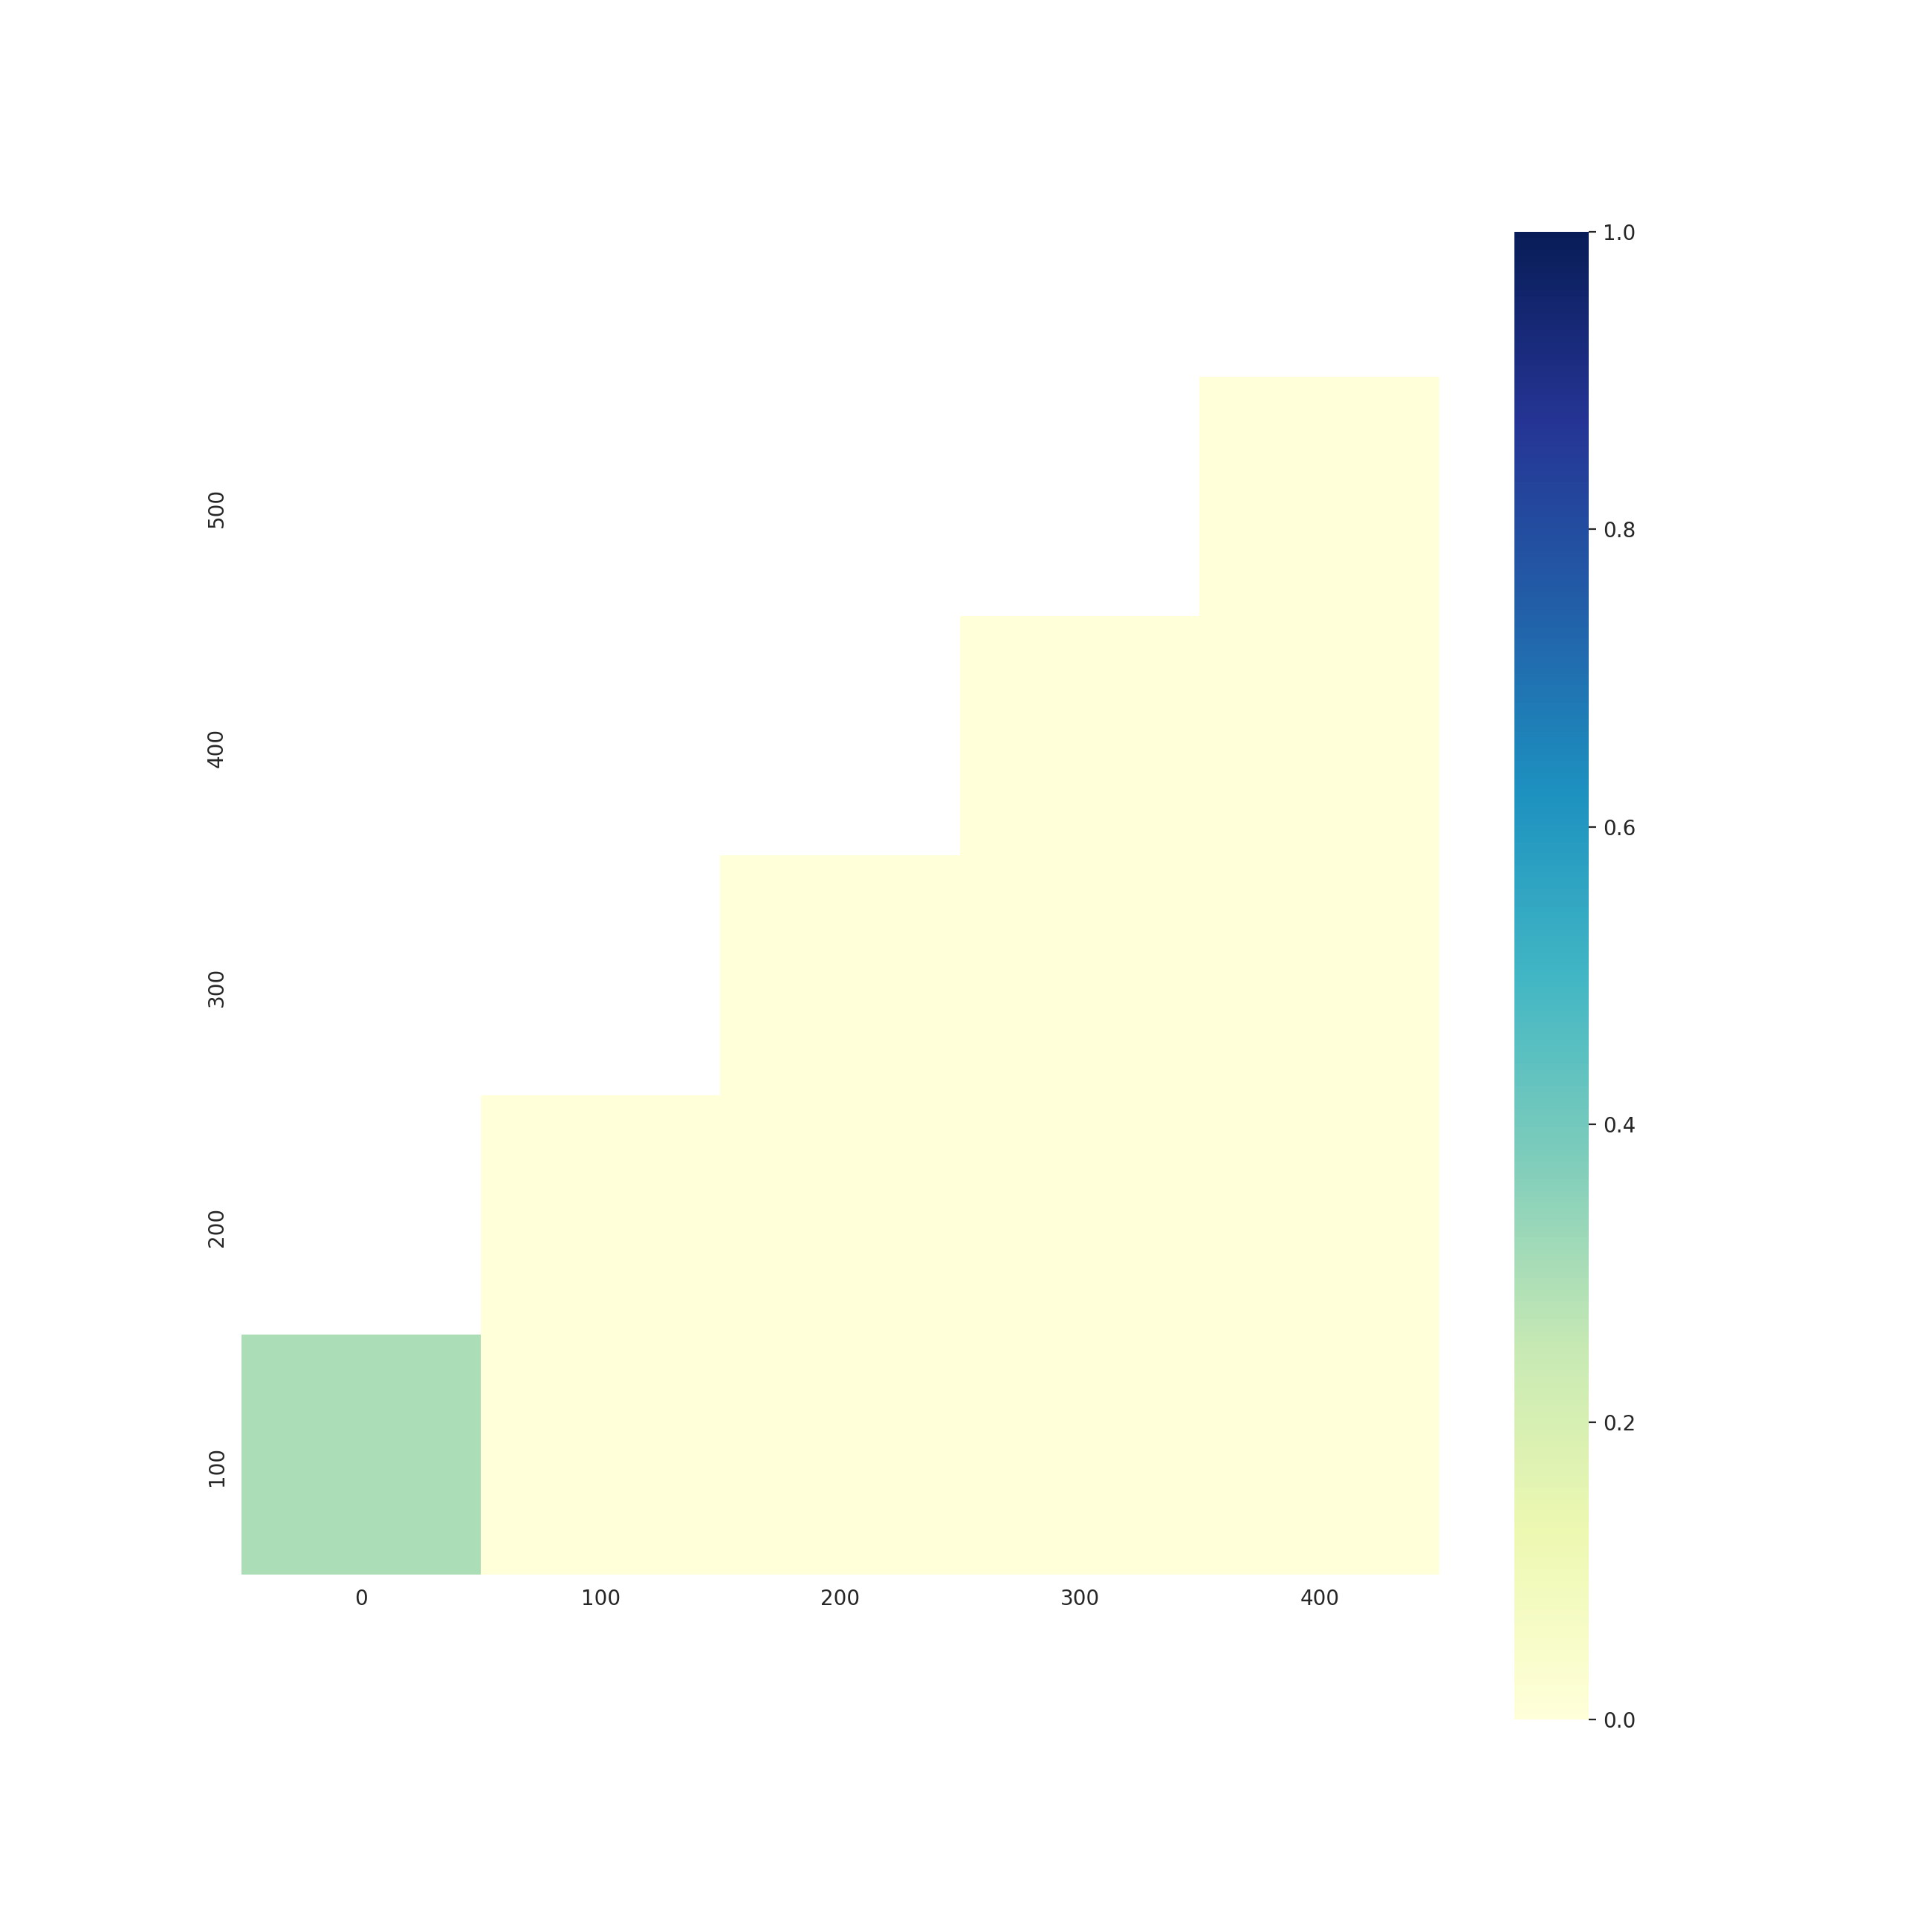

In [9]:
plot_hotmap(avg_res, mask)
#plt.savefig('hotmap_roundOff.png')

In [11]:
avg_res

array([[0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0.3, 0. , 0. , 0. , 0. ]])